In [3]:
#For dealing with tables
import pandas as pd
#For dealing with linear algebra
import numpy as np
#For data visualization and plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
#For minmaxscaler
from sklearn.preprocessing import MinMaxScaler,StandardScaler
#For shapiro test
from scipy.stats import shapiro
#For train-test split
from sklearn.model_selection import train_test_split,GridSearchCV
#For RandomForest
from sklearn.ensemble import RandomForestClassifier
#Accuracy score, confusion matrix, classification report, ROC curve, AUC
from sklearn.metrics import f1_score
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
Loan_train=pd.read_csv('/content/drive/MyDrive/AbiML/Colab Notebooks1/colab datas/train_Loan_Prediction_AV_.csv')
Loan_test=pd.read_csv('/content/drive/MyDrive/AbiML/Colab Notebooks1/colab datas/test_Loanprediction_AV.csv')

# Steps to do
* Understanding the Dataset
* Exploratory Data Analysis
    * Univariate Visual Analysis
    * Target Variable - Loan Status
    * Predictor Variables
    * Categorical Features
    * Ordinal Features
    * Numerical Features
    * Bivariate Analysis
    * Categorical Independent Vs Target
    * Numerical Independent vs Target
* Outlier Treatment
* Hypothesis Testing
    * Gender vs Loan Status:
    * Property Area vs Loan Status:
    * Credit History vs Loan Status:
    * Education vs Loan Status:
    * Dependents vs Loan Status:
    * Self Employed vs Loan Status:
    * Married vs Loan Status:
* Data Cleaning
* Converting Categorical to Numeric variables
* Missing Value Imputation
* Visualizing correlation via Headmap
* Correlation between Quantitative Variables

* Dummy variables for categorical variables

* Creating New Models

* Creating second model

* Creating third model 

In [5]:
Loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
Loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
Loan_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [8]:
Loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
Loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


lets see how much each field related and important to loan status
# EDA
 * Univariate Visual Analysis
    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49a9890bd0>,
      dtype=object)

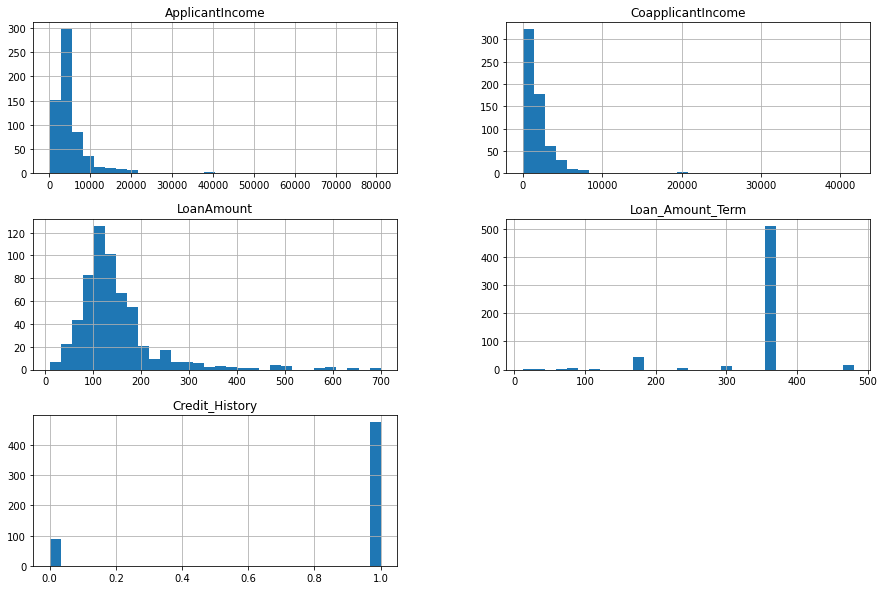

In [10]:
Loan_train.hist(bins=30, figsize=(15, 10))

###  * Target Variable - Loan Status
   

Y    422
N    192
Name: Loan_Status, dtype: int64

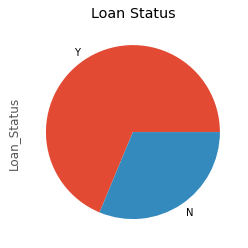

In [11]:
plt.style.use('ggplot')
Loan_train['Loan_Status'].value_counts().plot.pie(title='Loan Status',rot=0)
display(Loan_train['Loan_Status'].value_counts())

##    Predictor Variables
  * Categorical Features
  * Gender,	Married, Credit_History
  * Ordinal-	Dependents,	Education, Self_Employed

In [12]:
categorical=['Gender', 'Married', 'Credit_History']

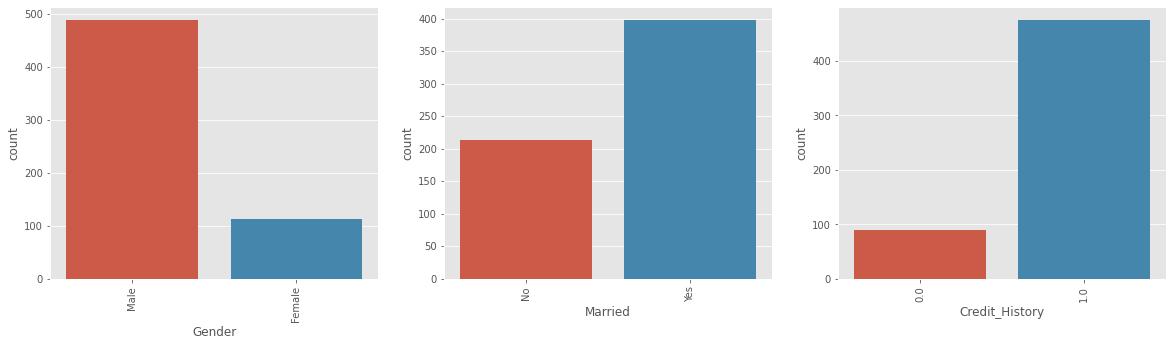

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(Loan_train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

## * Ordinal Features
   

In [14]:
ordinal=['Dependents', 'Education', 'Self_Employed']

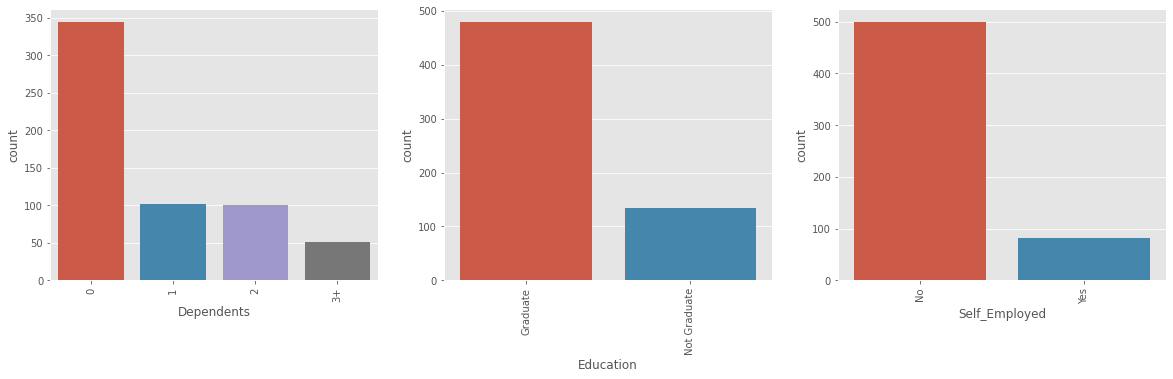

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for variable, subplot in zip(ordinal, ax.flatten()):
    sns.countplot(Loan_train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

##   * Numerical Features--ApplicantIncome, CoapplicantIncome,LoanAmount,	Loan_Amount_Term,	Credit_History.
    

In [16]:
numeric=['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term']

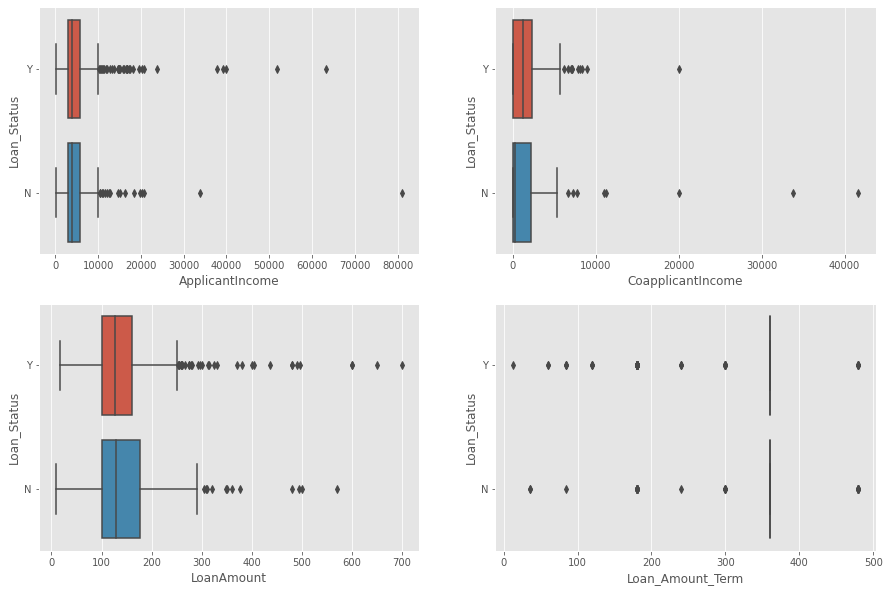

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for var, subplot in zip(numeric, ax.flatten()):
    sns.boxplot(x=var, y='Loan_Status', data=Loan_train, ax=subplot)

##  * Bivariate Analysis
  

In [18]:
Loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Loan-Status(target) VS Categorical Variables(Gender, Married, Credit_History)

## Categorical(independent var) vs categorical (dependent var)

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


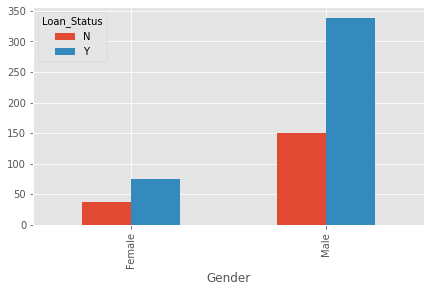

In [19]:
  CrosstabResult=pd.crosstab(index=Loan_train['Gender'],columns=Loan_train['Loan_Status'])
  print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
  CrosstabResult.plot.bar(figsize=(7,4))

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


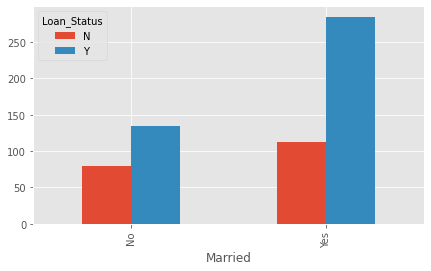

In [20]:
CrosstabResult=pd.crosstab(index=Loan_train['Married'],columns=Loan_train['Loan_Status'])
print(CrosstabResult)
 # Grouped bar chart between GENDER and Loan_Status
CrosstabResult.plot.bar(figsize=(7,4))

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


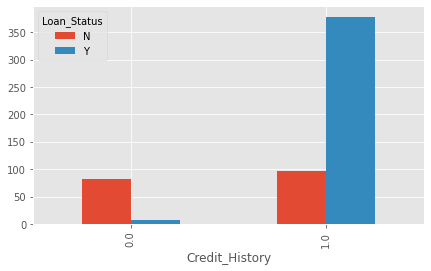

In [21]:
  CrosstabResult=pd.crosstab(index=Loan_train['Credit_History'],columns=Loan_train['Loan_Status'])
  print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
  CrosstabResult.plot.bar(figsize=(7,4))

## Ordinal- Dependents, Education, Self_Employed Vs Target (Loan_Status)

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


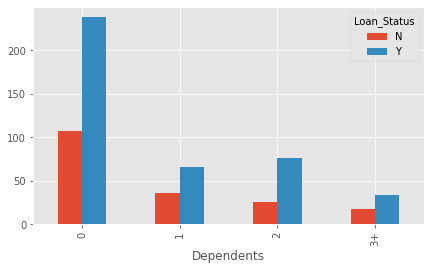

In [22]:
  CrosstabResult=pd.crosstab(index=Loan_train['Dependents'],columns=Loan_train['Loan_Status'])
  print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
  CrosstabResult.plot.bar(figsize=(7,4))

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


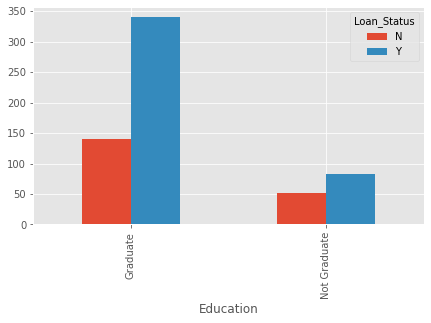

In [23]:
CrosstabResult=pd.crosstab(index=Loan_train['Education'],columns=Loan_train['Loan_Status'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(7,4))

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


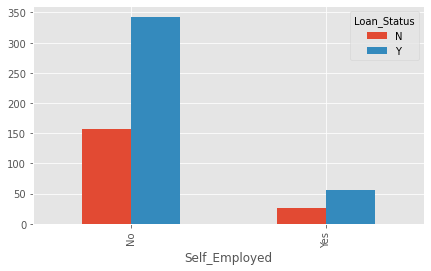

In [24]:
CrosstabResult=pd.crosstab(index=Loan_train['Self_Employed'],columns=Loan_train['Loan_Status'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(7,4))

In [25]:
# Cross tabulation between GENDER and APPROVE_LOAN
#categorical=[['Gender'], ['Married'], ['Credit_History']]
#fig, ax = plt.subplots(1, 3, figsize=(15, 10))
#for var, in zip(categorical):
#  CrosstabResult=pd.crosstab(index=var,columns=Loan_train['Loan_Status'])
#  print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
 # CrosstabResult.plot.bar(figsize=(7,4))

##  * Numerical Independent('ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term' ) vs Target(Loan_Status)

In [26]:
Loan_train['ApplicantIncome'].max()

81000

Loan_Status   N    Y
Income_bin          
Low          34   74
Average      67  159
High         45   98
Very high    46   91


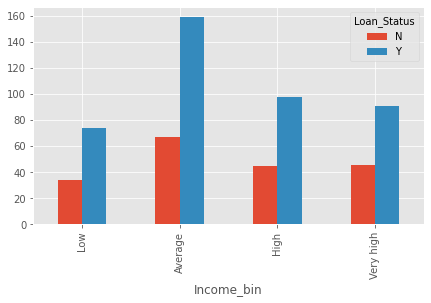

In [27]:
bins= [0,2500,4000,6000,81000]
group= ['Low', 'Average', 'High', 'Very high']
Loan_train['Income_bin']=pd.cut(Loan_train['ApplicantIncome'],bins,labels=group)
CrosstabResult=pd.crosstab(index=Loan_train['Income_bin'],columns=Loan_train['Loan_Status'])
print(CrosstabResult)
 
# Grouped bar chart between ApplicantIncome and Loan_Status
CrosstabResult.plot.bar(figsize=(7,4))


### Income bin for Test data



In [28]:
bins= [0,2500,4000,6000,81000]
group= ['Low', 'Average', 'High', 'Very high']
Loan_test['Income_bin']=pd.cut(Loan_test['ApplicantIncome'],bins,labels=group)

In [29]:
Loan_train['CoapplicantIncome'].max()

41667.0

Loan_Status     N    Y
ca_Income_bin         
Low            82  207
Average         6   18
High            3    1
Very high       2    0


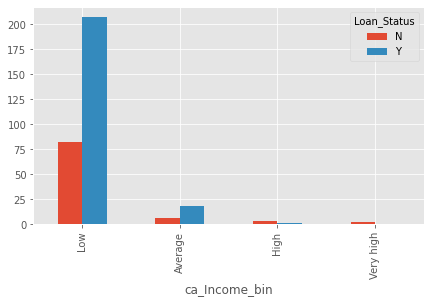

In [30]:
bins= [1000,5000,10000,20000,42000]
group= ['Low', 'Average', 'High', 'Very high']
Loan_train['ca_Income_bin']=pd.cut(Loan_train['CoapplicantIncome'],bins,labels=group)
CrosstabResult=pd.crosstab(index=Loan_train['ca_Income_bin'],columns=Loan_train['Loan_Status'])
print(CrosstabResult)
 
# Grouped bar chart between CoapplicantIncome and Loan_Status
CrosstabResult.plot.bar(figsize=(7,4))

In [31]:
bins= [1000,5000,10000,20000,42000]
group= ['Low', 'Average', 'High', 'Very high']
Loan_test['ca_Income_bin']=pd.cut(Loan_test['CoapplicantIncome'],bins,labels=group)

In [32]:
Loan_train['LoanAmount'].max()

700.0

Loan_Status    N    Y
LA_bin               
Low          150  362
Average       27   39
High           4    8
Very high      0    2


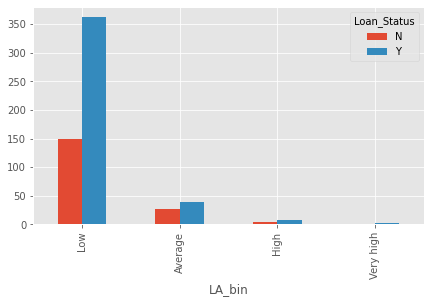

In [33]:
bins= [0,200,400,600,700]
group= ['Low', 'Average', 'High', 'Very high']
Loan_train['LA_bin']=pd.cut(Loan_train['LoanAmount'],bins,labels=group)
CrosstabResult=pd.crosstab(index=Loan_train['LA_bin'],columns=Loan_train['Loan_Status'])
print(CrosstabResult)
 
# Grouped bar chart between CoapplicantIncome and Loan_Status
CrosstabResult.plot.bar(figsize=(7,4))

Adding  LA_bins to Test data

In [34]:
bins= [0,200,400,600,700]
group= ['Low', 'Average', 'High', 'Very high']
Loan_test['LA_bin']=pd.cut(Loan_test['LoanAmount'],bins,labels=group)
#CrosstabResult=pd.crosstab(index=Loan_test['LA_Income_bin'],columns=Loan_test['Loan_Status'])
#print(CrosstabResult)
 
# Grouped bar chart between CoapplicantIncome and Loan_Status
#CrosstabResult.plot.bar(figsize=(7,4))

# Missing Values imputation

In [35]:
Loan_train.isna().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
Income_bin             0
ca_Income_bin        295
LA_bin                22
dtype: int64

### Replace mean in Integer variables and Mode in Categorical variables-Train Data

In [36]:
Loan_train['Gender'].fillna(Loan_train['Gender'].mode()[0], inplace=True)
Loan_train['Married'].fillna(Loan_train['Married'].mode()[0], inplace=True)
Loan_train['Dependents'].fillna(Loan_train['Dependents'].mode()[0], inplace=True)
Loan_train['Self_Employed'].fillna(Loan_train['Self_Employed'].mode()[0], inplace=True)
Loan_train['Credit_History'].fillna(Loan_train['Credit_History'].mode()[0], inplace=True)
Loan_train['Loan_Amount_Term'].fillna(Loan_train['Loan_Amount_Term'].mode()[0], inplace=True)
Loan_train['LoanAmount'].fillna(Loan_train['LoanAmount'].median(), inplace=True)

In [37]:
Loan_train.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
Income_bin             0
ca_Income_bin        295
LA_bin                22
dtype: int64

In [38]:
#Loan_train.drop(columns=['Income_bin','LA_Income_bin','ca_Income_bin'],inplace=True)

In [39]:
Loan_train.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
Income_bin             0
ca_Income_bin        295
LA_bin                22
dtype: int64

### Replace mean in Integer variables and Mode in Categorical variables-Test data 

In [40]:
Loan_test.isna().sum()

Loan_ID                0
Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             5
Loan_Amount_Term       6
Credit_History        29
Property_Area          0
Income_bin             2
ca_Income_bin        183
LA_bin                 5
dtype: int64

In [41]:
Loan_test['Gender'].fillna(Loan_test['Gender'].mode()[0], inplace=True)
Loan_test['Married'].fillna(Loan_test['Married'].mode()[0], inplace=True)
Loan_test['Dependents'].fillna(Loan_test['Dependents'].mode()[0], inplace=True)
Loan_test['Self_Employed'].fillna(Loan_test['Self_Employed'].mode()[0], inplace=True)
Loan_test['Credit_History'].fillna(Loan_test['Credit_History'].mode()[0], inplace=True)
Loan_test['Loan_Amount_Term'].fillna(Loan_test['Loan_Amount_Term'].mode()[0], inplace=True)
Loan_test['LoanAmount'].fillna(Loan_test['LoanAmount'].median(), inplace=True)

### Replace category to numeric

In [42]:
Loan_train['Dependents'].replace('3+',3,inplace=True)
Loan_train['Loan_Status'].replace('N',0, inplace=True)
Loan_train['Loan_Status'].replace('Y',1,inplace=True)

In [43]:
Loan_train.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status             int64
Income_bin           category
ca_Income_bin        category
LA_bin               category
dtype: object

Change for test data 

In [44]:
Loan_test['Dependents'].replace('3+',3,inplace=True)
#Loan_test['Loan_Status'].replace('N',0, inplace=True)
#Loan_test['Loan_Status'].replace('Y',1,inplace=True)

In [45]:
Loan_test.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome       int64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Income_bin           category
ca_Income_bin        category
LA_bin               category
dtype: object

# Outlier Treatment

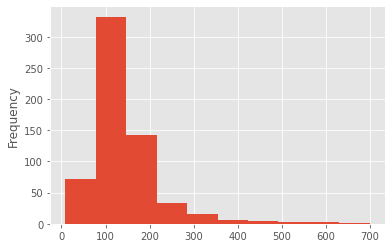

In [46]:
Loan_train['LoanAmount'].plot.hist()

In [47]:
# IQR
Q1 = np.percentile(Loan_train['LoanAmount'], 25,
                   interpolation = 'midpoint')
print(Q1) 
Q3 = np.percentile(Loan_train['LoanAmount'], 75,
                   interpolation = 'midpoint')
print(Q3)
IQR = Q3 - Q1
print(IQR)

100.5
164.5
64.0


loan amount distribution seems like skewed, lets do log transformation to make it as normal distribution

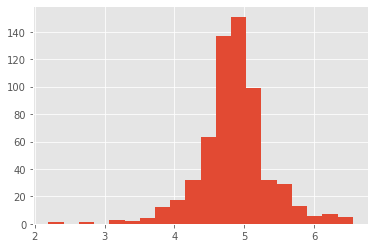

In [48]:
Loan_train['LoanAmount_log']=np.log(Loan_train['LoanAmount'])
Loan_train['LoanAmount_log'].hist(bins=20)

In [49]:
# IQR
Q1 = np.percentile(Loan_train['LoanAmount_log'], 25,
                   interpolation = 'midpoint')
print(Q1) 
Q3 = np.percentile(Loan_train['LoanAmount_log'], 75,
                   interpolation = 'midpoint')
print(Q3)
IQR = Q3 - Q1
print(IQR)

4.610145351414676
5.1029059508623895
0.49276059944771333


In [50]:
Loan_train_cpy=Loan_train.copy()

Dropping unwanted columns

In [51]:
Loan_train_cpy.drop(columns=['LoanAmount','Loan_ID', 'Gender', 'Married'],inplace=True)

Test data log transformation

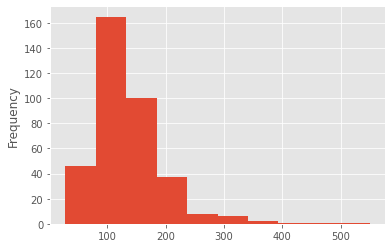

In [52]:
Loan_test['LoanAmount'].plot.hist()

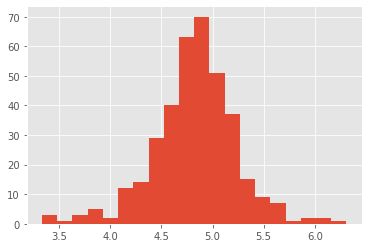

In [53]:
Loan_test['LoanAmount_log']=np.log(Loan_test['LoanAmount'])
Loan_test['LoanAmount_log'].hist(bins=20)

In [54]:
Loan_test_cpy=Loan_test.copy()

In [55]:
Loan_test_cpy.drop(columns=['LoanAmount','Loan_ID', 'Gender', 'Married'],inplace=True)

In [56]:
Loan_test_cpy.dtypes

Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome       int64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Income_bin           category
ca_Income_bin        category
LA_bin               category
LoanAmount_log        float64
dtype: object

Get_dummies for train

In [57]:
Loan_train_cpy=pd.get_dummies(Loan_train_cpy)
#Loan_data=pd.get_dummies(Loan_data)

In [58]:
Loan_train_cpy

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Income_bin_Low,Income_bin_Average,Income_bin_High,Income_bin_Very high,ca_Income_bin_Low,ca_Income_bin_Average,ca_Income_bin_High,ca_Income_bin_Very high,LA_bin_Low,LA_bin_Average,LA_bin_High,LA_bin_Very high
0,5849,0.0,360.0,1.0,1,4.852030,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,4583,1508.0,360.0,1.0,0,4.852030,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
2,3000,0.0,360.0,1.0,1,4.189655,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
3,2583,2358.0,360.0,1.0,1,4.787492,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0
4,6000,0.0,360.0,1.0,1,4.948760,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,360.0,1.0,1,4.262680,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
610,4106,0.0,180.0,1.0,1,3.688879,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
611,8072,240.0,360.0,1.0,1,5.533389,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
612,7583,0.0,360.0,1.0,1,5.231109,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0


# Model 1a- LR

# Split train data into X and Y

In [59]:
X= Loan_train_cpy.drop(columns=['Loan_Status'])

In [60]:
Y=Loan_train_cpy['Loan_Status']

Split Train as train and validation data set

In [61]:
from sklearn.model_selection import train_test_split
X_Train, X_valid, Y_Train, Y_valid = train_test_split(X, Y, test_size = 0.30, random_state = 100)

Lets do scaling

In [62]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train_scale = sc_X.fit_transform(X_Train)
X_valid_scale = sc_X.transform(X_valid)

In [63]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression().fit(X_Train_scale, Y_Train)

Y_valid_pred = modelLR.predict(X_valid)

In [64]:
y_valid_pred=pd.DataFrame(Y_valid_pred)

In [65]:
y_valid_pred.value_counts()

0    113
1     72
dtype: int64

In [66]:
## Make the Confusion Matrix

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(Y_valid, y_valid_pred)
print(cm)
acc_Test_LR= accuracy_score(Y_valid, y_valid_pred)
print(acc_Test_LR)
print(classification_report(Y_valid, y_valid_pred))

[[33 30]
 [80 42]]
0.40540540540540543
              precision    recall  f1-score   support

           0       0.29      0.52      0.38        63
           1       0.58      0.34      0.43       122

    accuracy                           0.41       185
   macro avg       0.44      0.43      0.40       185
weighted avg       0.48      0.41      0.41       185



# Model 1b- SVC 

In [67]:
#### Step 5 Fit SVM to the Training set Using Linear
#### This SVC class allows us to build a kernel SVM model (linear as well as non-linear),

from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear', random_state = 100)
classifier_svc.fit(X_Train_scale, Y_Train)

SVC(kernel='linear', random_state=100)

In [68]:
#### Predicting the test set results
#### The classifier.fit(X_train, y_train) fit the SVM algorithm to the training set- X_train and y_train.
#### Predict the Test Results

Y_valid_Pred_svc = classifier_svc.predict(X_valid_scale)

In [69]:
Y_valid_Pred_svc=pd.DataFrame(Y_valid_Pred_svc)

In [70]:
## Make the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve,accuracy_score

#from sklearn.metrics import confusion_matrix,accuracy_score
cm_svc = confusion_matrix(Y_valid, Y_valid_Pred_svc)
print(cm_svc)
acc_Test_svc= accuracy_score(Y_valid, Y_valid_Pred_svc)
print(acc_Test_svc)
print(classification_report(Y_valid, Y_valid_Pred_svc))

[[ 26  37]
 [  4 118]]
0.7783783783783784
              precision    recall  f1-score   support

           0       0.87      0.41      0.56        63
           1       0.76      0.97      0.85       122

    accuracy                           0.78       185
   macro avg       0.81      0.69      0.71       185
weighted avg       0.80      0.78      0.75       185



# Model 2- chosing Features using Odds Ratio and Logit() function in LR model

Improve the accuracy by chosing feature importance via Logit() 

In [71]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
model2=sm.Logit(Y,X )

result2=model2.fit()

print(result2.summary())

         Current function value: 0.439066
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      590
Method:                           MLE   Df Model:                           23
Date:                Wed, 01 Dec 2021   Pseudo R-squ.:                  0.2932
Time:                        12:30:55   Log-Likelihood:                -269.59
converged:                      False   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                 7.911e-35
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
ApplicantIncome          3.282e-05   2.75e-05      1.192      0.233   -2.12e-05    8.68e-05
CoapplicantIncome        1

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### * Odds Ratio(OR) is a measure of the strength of association with an exposure and an outcome.

* OR > 1 means greater odds of association with the exposure and outcome.

* OR = 1 means there is no association between exposure and outcome.

* OR < 1 means there is a lower odds of association between the exposure and  outcome.

In [72]:
model_V2=LogisticRegression()
model_V2.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100,multi_class='ovr',n_jobs=1,penalty='12',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

df=pd.DataFrame({'odds_ratio':(np.exp(model_V2.coef_).T).tolist(),'variable':X.columns.tolist()})
df['odds_ratio'] = df['odds_ratio'].str.get(0)

df=df.sort_values('odds_ratio', ascending=False)
df

,odds_ratio,variable
3,20.465674,Credit_History
14,2.100394,Property_Area_Semiurban
24,1.685493,LA_bin_Low
20,1.600944,ca_Income_bin_Low
9,1.464296,Education_Graduate
8,1.452207,Dependents_2
21,1.187276,ca_Income_bin_Average
16,1.180063,Income_bin_Low
17,1.048929,Income_bin_Average
27,1.045534,LA_bin_Very high


### Choose features Credit_History, Property , Loan amount, and coapplicant income  

In [73]:
Loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'ca_Income_bin', 'LA_bin', 'LoanAmount_log'],
      dtype='object')

In [74]:
Loan_model2 = Loan_train.filter(['Credit_History', 'CoapplicantIncome','LoanAmount','Property_Area'], axis=1)
Loan_model2=pd.get_dummies(Loan_model2)

In [75]:
model2 = LogisticRegression()
model2.fit(Loan_model2,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100,multi_class='ovr',n_jobs=1,penalty='12',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

df2=pd.DataFrame({'odds_ratio':(np.exp(model2.coef_).T).tolist(),'variable':Loan_model2.columns.tolist()})
df2['odds_ratio'] = df2['odds_ratio'].str.get(0)

df2=df2.sort_values('odds_ratio', ascending=False)
df2

,odds_ratio,variable
0,28.325901,Credit_History
4,1.009555,Property_Area_Semiurban
1,0.999954,CoapplicantIncome
2,0.999267,LoanAmount
5,0.554733,Property_Area_Urban
3,0.438456,Property_Area_Rural


### Split train and test for LR model 

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train_m2, X_valid_m2, y_train_m2, y_valid_m2 = train_test_split(Loan_model2, Y, test_size=0.3, random_state=0)
logreg_m2 = LogisticRegression()
logreg_m2.fit(X_train_m2, y_train_m2)

LogisticRegression()

In [77]:
Y_valid_pred_m2 = logreg_m2.predict(X_valid_m2)

In [78]:
Y_valid_pred_m2=pd.DataFrame(Y_valid_pred_m2)

In [108]:
Y_valid_pred_m2.value_counts()

1    306
0     61
dtype: int64

In [79]:
## Make the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_valid_m2, Y_valid_pred_m2)
print(cm)
acc_Test_LR= accuracy_score(y_valid_m2, Y_valid_pred_m2)
print(acc_Test_LR)
print(classification_report(y_valid_m2, Y_valid_pred_m2))

[[ 22  29]
 [  2 132]]
0.8324324324324325
              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



# Model 2b- XGboost

In [80]:
!pip install xgboost==1.3.3

In [81]:
#XGBOOST
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

i=1 
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(Loan_model2,Y): 
 print('\n{} of kfold {}'.format(i,kf.n_splits)) 
 xtr,xvl = Loan_model2.loc[train_index],Loan_model2.loc[test_index] 
 ytr,yvl = Y[train_index],Y[test_index] 
 model = XGBClassifier(n_estimators=50, max_depth=4) 
 model.fit(xtr, ytr) 
 pred_test = model.predict(xvl) 
 score = accuracy_score(yvl,pred_test) 
 mean += score
 print ('accuracy_score',score)



1 of kfold 5
[12:30:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.7804878048780488

1 of kfold 5
[12:30:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.7886178861788617

1 of kfold 5
[12:30:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.7886178861788617

1 of kfold 5
[12:30:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default eva

# Model 2c- SVC

In [88]:
X_train_m2.shape

(429, 6)

In [87]:
y_train_m2.shape

(429,)

In [89]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'rbf', random_state = 10)
classifier_svc.fit(X_train_m2, y_train_m2)
#X_train_m2, X_valid_m2, y_train_m2, y_valid_m2

SVC(random_state=10)

In [90]:
#### Predicting the test set results
#### The classifier.fit(X_train, y_train) fit the SVM algorithm to the training set- X_train and y_train.
#### Predict the Test Results

Y_valid_Pred_svc_m2 = classifier_svc.predict(X_valid_m2)

In [91]:
Y_valid_Pred_svc_m2=pd.DataFrame(Y_valid_Pred_svc)

In [92]:
## Make the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve,accuracy_score

#from sklearn.metrics import confusion_matrix,accuracy_score
cm_svc = confusion_matrix(y_valid_m2, Y_valid_Pred_svc_m2)
print(cm_svc)
acc_Test_svc= accuracy_score(y_valid_m2, Y_valid_Pred_svc_m2)
print(acc_Test_svc)
print(classification_report(y_valid_m2, Y_valid_Pred_svc_m2))

[[  5  46]
 [ 25 109]]
0.6162162162162163
              precision    recall  f1-score   support

           0       0.17      0.10      0.12        51
           1       0.70      0.81      0.75       134

    accuracy                           0.62       185
   macro avg       0.43      0.46      0.44       185
weighted avg       0.56      0.62      0.58       185



### LR model is better than SVC. so lets predict out real test data by using our model 2a using LR model

In [93]:
Loan_model2.columns

Index(['Credit_History', 'CoapplicantIncome', 'LoanAmount',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

Lets do feature selection and getdummies for test data set too

In [109]:
Loan_test.shape

(367, 16)

In [110]:
Loan_model2_test = Loan_test.filter(['Credit_History', 'CoapplicantIncome','LoanAmount','Property_Area'], axis=1)
Loan_model2_test=pd.get_dummies(Loan_model2_test)

In [111]:
Y_valid_pred_m2_test = logreg_m2.predict(Loan_model2_test)

In [112]:
Y_valid_pred_m2_test=pd.DataFrame(Y_valid_pred_m2_test)

In [113]:
Y_valid_pred_m2_test.value_counts()

1    306
0     61
dtype: int64

In [100]:
Y_valid_pred_m2_test

,0
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [117]:
submission=pd.DataFrame()

In [119]:
submission['Loan_Status']=Y_valid_pred_m2_test[0]
submission['Loan_ID']=Loan_test['Loan_ID']
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
print(submission)


    Loan_Status   Loan_ID
0             Y  LP001015
1             Y  LP001022
2             Y  LP001031
3             Y  LP001035
4             Y  LP001051
..          ...       ...
362           Y  LP002971
363           Y  LP002975
364           Y  LP002980
365           Y  LP002986
366           Y  LP002989

[367 rows x 2 columns]


In [122]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('LoanPrediction_Hakathon_submission.csv')